In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SLNet, SUnet, SL_AEnet, AEnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]

In [5]:
net1 = AEnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=10,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          10
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  67%|██████▋   | 618/916 [01:52<01:10,  4.24batch/s]


Validation round: 100%|██████████| 916/916 [02:54<00:00,  4.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.13611510987332553
Validation round:  24%|██▍       | 218/916 [00:12<00:42, 16.53batch/s]


Validation round:  81%|████████  | 744/916 [00:39<00:08, 20.22batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 17.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.11240702235509996
Validation round:  41%|████▏     | 380/916 [00:20<00:33, 16.11batch/s]


Validation round:  99%|█████████▉| 906/916 [00:46<00:00, 17.04batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 18.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.10394286509098966
Validation round:  49%|████▉     | 449/916 [00:22<00:23, 19.82batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 19.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.09707514548015386
Validation round:   3%|▎         | 32/916 [00:02<01:27, 10.10batch/s]


Validation round:  61%|██████▏   | 562/916 [00:30<00:23, 14.95batch/s]


Validation round:  99%|█████████▉| 911/916 [00:48<00:00, 18.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.09115515003493259
Epoch 1/10: 100%|██████████| 7329/7329 [07:12<00:00, 16.96img/s, loss (batch)=0.253] 
INFO: Checkpoint 1 saved !
Validation round:  12%|█▏        | 110/916 [00:06<00:51, 15.67batch/s]


Validation round:  69%|██████▊   | 628/916 [00:34<00:19, 14.67batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 22.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.09036710098646093
Validation round:  25%|██▍       | 225/916 [00:13<00:38, 18.11batch/s]


Validation round:  75%|███████▌  | 687/916 [00:37<00:14, 16.15batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 20.63batch/s]
                                                                      INFO: Validation Dice Loss: 0.09395764292295063
Validation round:  24%|██▍       | 221/916 [00:12<00:47, 14.66batch/s]


Validation round:  78%|███████▊  | 717/916 [00:39<00:13, 15.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 18.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.08746320237791955
Validation round:  33%|███▎      | 306/916 [00:17<00:41, 14.82batch/s]


Validation round:  91%|█████████ | 829/916 [00:47<00:05, 16.81batch/s]


Validation round: 100%|█████████▉| 912/916 [00:51<00:00, 18.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.08468536295679979
Validation round:  46%|████▌     | 417/916 [00:23<00:25, 19.22batch/s]


Validation round:  97%|█████████▋| 890/916 [00:49<00:01, 13.76batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 17.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.08376586769085263
Epoch 2/10: 100%|██████████| 7329/7329 [05:02<00:00, 24.26img/s, loss (batch)=0.271] 
INFO: Checkpoint 2 saved !
Validation round:  47%|████▋     | 432/916 [00:24<00:23, 20.67batch/s]


Validation round:  95%|█████████▌| 872/916 [00:48<00:02, 20.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 16.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.08358793631684051
Validation round:  41%|████      | 373/916 [00:21<00:33, 16.28batch/s]


Validation round:  93%|█████████▎| 854/916 [00:47<00:03, 17.15batch/s]


Validation round: 100%|█████████▉| 912/916 [00:50<00:00, 17.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.08016261625953637
Validation round:  33%|███▎      | 304/916 [00:17<00:41, 14.88batch/s]


Validation round:  83%|████████▎ | 759/916 [00:42<00:10, 14.86batch/s]


Validation round:  99%|█████████▉| 911/916 [00:50<00:00, 18.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.077372808513683
Validation round:  44%|████▎     | 399/916 [00:20<00:21, 23.99batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 16.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.07942185490737835
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  53%|█████▎    | 484/916 [00:26<00:23, 18.19batch/s]


Validation round:  99%|█████████▉| 909/916 [00:49<00:00, 17.94batch/s]
                                                                      INFO: Validation Dice Loss: 0.08063300400484337
Epoch 3/10: 100%|██████████| 7329/7329 [05:00<00:00, 24.41img/s, loss (batch)=0.127] 
INFO: Checkpoint 3 saved !
Validation round:   8%|▊         | 72/916 [00:04<00:47, 17.67batch/s]


Validation round:  62%|██████▏   | 572/916 [00:31<00:22, 15.34batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 17.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.074568151622425
Validation round:  15%|█▍        | 137/916 [00:08<00:38, 20.32batch/s]


Validation round:  69%|██████▉   | 635/916 [00:34<00:19, 14.27batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 20.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.08290306046019474
Validation round:  29%|██▉       | 270/916 [00:14<00:30, 21.30batch/s]


Validation round:  81%|████████  | 744/916 [00:42<00:09, 18.16batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 19.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.07343480284590127
Validation round:  41%|████      | 372/916 [00:19<00:34, 15.89batch/s]


Validation round:  99%|█████████▉| 910/916 [00:45<00:00, 18.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.07286813626610816


Validation round:  52%|█████▏    | 472/916 [00:25<00:26, 17.00batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 23.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.0722842955937422
Epoch 4/10: 100%|██████████| 7329/7329 [04:53<00:00, 24.93img/s, loss (batch)=0.138] 
INFO: Checkpoint 4 saved !
Validation round:   9%|▉         | 81/916 [00:05<00:45, 18.19batch/s]


Validation round:  64%|██████▎   | 582/916 [00:31<00:18, 18.16batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 22.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.07140331825151974
Validation round:  16%|█▋        | 151/916 [00:08<00:46, 16.60batch/s]


Validation round:  70%|███████   | 643/916 [00:35<00:14, 18.46batch/s]


Validation round: 100%|█████████▉| 912/916 [00:49<00:00, 19.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.07136321709568584
Validation round:  22%|██▏       | 201/916 [00:11<00:39, 18.05batch/s]


Validation round:  75%|███████▌  | 689/916 [00:38<00:13, 16.45batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 19.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.0742326792589832
Validation round:  26%|██▌       | 236/916 [00:13<00:44, 15.19batch/s]


Validation round:  83%|████████▎ | 758/916 [00:41<00:09, 16.82batch/s]


Validation round: 100%|█████████▉| 914/916 [00:49<00:00, 19.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.07139852543780377
Validation round:  34%|███▍      | 315/916 [00:17<00:36, 16.44batch/s]


Validation round:  72%|███████▏  | 662/916 [00:38<00:20, 12.46batch/s]


Validation round: 100%|█████████▉| 915/916 [00:52<00:00, 23.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.0710201457826071
Epoch 5/10: 100%|██████████| 7329/7329 [05:01<00:00, 24.28img/s, loss (batch)=0.0979]
INFO: Checkpoint 5 saved !
Validation round:  17%|█▋        | 160/916 [00:12<00:49, 15.31batch/s]


Validation round:  55%|█████▌    | 505/916 [00:35<00:20, 20.03batch/s]


Validation round:  91%|█████████▏| 836/916 [00:55<00:04, 19.10batch/s]


Validation round: 100%|█████████▉| 913/916 [00:59<00:00, 15.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.07177643309546611
Validation round:  34%|███▎      | 308/916 [00:15<00:28, 21.21batch/s]


Validation round:  82%|████████▏ | 748/916 [00:36<00:07, 21.88batch/s]


Validation round: 100%|█████████▉| 912/916 [00:43<00:00, 20.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.06992801831929445
Validation round:  30%|██▉       | 274/916 [00:12<00:30, 21.22batch/s]


Validation round:  79%|███████▉  | 724/916 [00:32<00:10, 17.90batch/s]


Validation round: 100%|█████████▉| 914/916 [00:41<00:00, 22.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.07439866270788632
Validation round:  21%|██        | 191/916 [00:10<00:40, 18.04batch/s]


Validation round:  66%|██████▌   | 600/916 [00:32<00:14, 21.28batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 21.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.06849746457321415
Validation round:   9%|▉         | 86/916 [00:05<00:41, 20.10batch/s]


Validation round:  50%|█████     | 459/916 [00:24<00:24, 18.61batch/s]


Validation round:  91%|█████████ | 833/916 [00:45<00:05, 15.81batch/s]


Validation round: 100%|█████████▉| 914/916 [00:49<00:00, 17.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.06721678639733634
Epoch 6/10: 100%|██████████| 7329/7329 [05:08<00:00, 23.76img/s, loss (batch)=0.119] 
INFO: Checkpoint 6 saved !
Validation round:  29%|██▉       | 264/916 [00:16<00:31, 20.79batch/s]


Validation round:  70%|██████▉   | 639/916 [00:38<00:14, 19.24batch/s]


Validation round: 100%|██████████| 916/916 [00:52<00:00, 19.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.06795425964397374
Validation round:   7%|▋         | 66/916 [00:04<00:46, 18.40batch/s]


Validation round:  46%|████▌     | 418/916 [00:24<00:35, 13.84batch/s]


Validation round:  85%|████████▍ | 776/916 [00:46<00:07, 18.95batch/s]


Validation round: 100%|█████████▉| 914/916 [00:54<00:00, 18.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.06721905618906021
Validation round:  22%|██▏       | 197/916 [00:12<00:42, 17.02batch/s]


Validation round:  62%|██████▏   | 569/916 [00:31<00:16, 21.39batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 17.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.06708654095154402
Validation round:   2%|▏         | 14/916 [00:01<04:21,  3.45batch/s]


Validation round:  41%|████      | 374/916 [00:23<00:32, 16.81batch/s]


Validation round:  77%|███████▋  | 701/916 [00:42<00:12, 16.76batch/s]


Validation round: 100%|█████████▉| 915/916 [00:55<00:00, 20.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.06888638503491618
Validation round:  16%|█▋        | 151/916 [00:08<00:35, 21.26batch/s]


Validation round:  57%|█████▋    | 525/916 [00:27<00:22, 17.22batch/s]


Validation round:  97%|█████████▋| 889/916 [00:48<00:01, 14.55batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 17.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.06671865158368667
Epoch 7/10: 100%|██████████| 7329/7329 [05:29<00:00, 22.25img/s, loss (batch)=0.128] 
INFO: Checkpoint 7 saved !
Validation round:  34%|███▍      | 311/916 [00:19<00:34, 17.54batch/s]


Validation round:  82%|████████▏ | 755/916 [00:40<00:07, 22.22batch/s]


Validation round: 100%|█████████▉| 915/916 [00:46<00:00, 25.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.06637687598839077
Validation round:  28%|██▊       | 257/916 [00:12<00:25, 25.58batch/s]


Validation round:  73%|███████▎  | 668/916 [00:32<00:12, 19.17batch/s]


Validation round: 100%|█████████▉| 914/916 [00:45<00:00, 19.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.06618803262905783
Validation round:  17%|█▋        | 155/916 [00:08<00:42, 18.01batch/s]


Validation round:  65%|██████▍   | 591/916 [00:29<00:14, 22.49batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 22.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.0663978830874617
Validation round:  13%|█▎        | 120/916 [00:05<00:32, 24.46batch/s]


Validation round:  56%|█████▌    | 513/916 [00:26<00:18, 22.14batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 21.38batch/s]


                                                                      INFO: Validation Dice Loss: 0.06679284878433012
Validation round:  44%|████▎     | 399/916 [00:19<00:24, 21.36batch/s]


Validation round:  92%|█████████▏| 839/916 [00:39<00:04, 17.65batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 22.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.06520073190656812
Epoch 8/10: 100%|██████████| 7329/7329 [04:51<00:00, 25.13img/s, loss (batch)=0.116] 
INFO: Checkpoint 8 saved !
Validation round:  34%|███▍      | 310/916 [00:17<00:29, 20.82batch/s]


Validation round:  78%|███████▊  | 718/916 [00:38<00:09, 19.96batch/s]


Validation round: 100%|█████████▉| 912/916 [00:48<00:00, 16.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.06661013131513867
Validation round:  26%|██▌       | 236/916 [00:10<00:30, 22.16batch/s]


Validation round:  77%|███████▋  | 705/916 [00:29<00:08, 25.12batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 23.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.06698570865731052
Validation round:  19%|█▉        | 173/916 [00:09<00:43, 17.03batch/s]


Validation round:  63%|██████▎   | 578/916 [00:30<00:17, 18.97batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 22.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.06484825896936994
Validation round:   7%|▋         | 63/916 [00:03<00:40, 20.81batch/s]


Validation round:  53%|█████▎    | 490/916 [00:21<00:18, 23.13batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 22.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.06594426961672618
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  44%|████▎     | 400/916 [00:21<00:28, 18.20batch/s]


Validation round:  89%|████████▉ | 815/916 [00:40<00:05, 19.18batch/s]


Validation round: 100%|██████████| 916/916 [00:45<00:00, 22.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.06612422504344362
Epoch 9/10: 100%|██████████| 7329/7329 [04:50<00:00, 25.27img/s, loss (batch)=0.0994]
INFO: Checkpoint 9 saved !
Validation round:  38%|███▊      | 346/916 [00:15<00:29, 19.48batch/s]


Validation round:  82%|████████▏ | 752/916 [00:35<00:08, 18.91batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 21.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.0672654438210757
Validation round:  28%|██▊       | 258/916 [00:12<00:29, 22.63batch/s]


Validation round:  75%|███████▌  | 687/916 [00:31<00:09, 25.38batch/s]


Validation round: 100%|█████████▉| 913/916 [00:41<00:00, 23.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.06320859719572108
Validation round:  23%|██▎       | 213/916 [00:09<00:26, 26.45batch/s]


Validation round:  72%|███████▏  | 661/916 [00:29<00:11, 22.62batch/s]


Validation round: 100%|█████████▉| 915/916 [00:41<00:00, 21.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.06293371767944383
Validation round:  19%|█▉        | 173/916 [00:09<00:33, 21.87batch/s]


Validation round:  67%|██████▋   | 617/916 [00:29<00:13, 21.84batch/s]


Validation round: 100%|██████████| 916/916 [00:41<00:00, 22.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.062424915887447946
Validation round:  16%|█▌        | 145/916 [00:06<00:29, 25.74batch/s]


Validation round:  62%|██████▏   | 566/916 [00:27<00:19, 17.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:44<00:00, 24.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.06262672651054818
Epoch 10/10: 100%|██████████| 7329/7329 [04:40<00:00, 26.14img/s, loss (batch)=0.102] 
INFO: Checkpoint 10 saved !


In [6]:
net2 = SL_AEnet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=10,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          10
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  40%|████      | 368/916 [00:17<00:24, 22.02batch/s]


Validation round:  86%|████████▋ | 792/916 [00:36<00:05, 21.50batch/s]


Validation round: 100%|█████████▉| 912/916 [00:41<00:00, 21.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.13930481486835855
Validation round:  30%|███       | 279/916 [00:14<00:30, 20.89batch/s]


Validation round:  78%|███████▊  | 711/916 [00:35<00:11, 18.17batch/s]


Validation round: 100%|█████████▉| 914/916 [00:45<00:00, 23.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.1380994594106898
Validation round:  27%|██▋       | 243/916 [00:11<00:30, 22.06batch/s]


Validation round:  76%|███████▋  | 700/916 [00:30<00:08, 25.51batch/s]


Validation round: 100%|█████████▉| 912/916 [00:40<00:00, 21.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.13235073036404416
Validation round:  23%|██▎       | 211/916 [00:10<00:30, 23.31batch/s]


Validation round:  67%|██████▋   | 611/916 [00:28<00:13, 22.05batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 19.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.12815473731363183
Validation round:  14%|█▍        | 126/916 [00:06<00:35, 22.35batch/s]


Validation round:  63%|██████▎   | 580/916 [00:25<00:14, 22.45batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 25.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.1287795866404428
Epoch 1/10: 100%|██████████| 7329/7329 [04:35<00:00, 26.58img/s, loss (batch)=0.397] 
INFO: Checkpoint 1 saved !
Validation round:   9%|▉         | 81/916 [00:04<00:43, 19.06batch/s]


Validation round:  53%|█████▎    | 483/916 [00:23<00:19, 22.58batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 23.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.12252422031747201


Validation round:  51%|█████     | 465/916 [00:19<00:18, 24.17batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 24.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.12323309064692285


Validation round:  45%|████▍     | 412/916 [00:19<00:22, 22.33batch/s]


Validation round:  93%|█████████▎| 855/916 [00:39<00:02, 22.97batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 19.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.1212740553843923
Validation round:  43%|████▎     | 390/916 [00:17<00:22, 23.06batch/s]


Validation round:  95%|█████████▌| 874/916 [00:38<00:01, 21.01batch/s]


Validation round:  99%|█████████▉| 909/916 [00:39<00:00, 20.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.09630324837129449
Validation round:  43%|████▎     | 392/916 [00:18<00:21, 24.47batch/s]


Validation round:  91%|█████████▏| 837/916 [00:39<00:04, 18.39batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 22.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.09676324009212084
Epoch 2/10: 100%|██████████| 7329/7329 [04:32<00:00, 26.94img/s, loss (batch)=0.191] 
INFO: Checkpoint 2 saved !
Validation round:  39%|███▊      | 353/916 [00:15<00:24, 22.86batch/s]


Validation round:  87%|████████▋ | 793/916 [00:34<00:05, 22.64batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 21.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.09423770327690387
Validation round:  30%|██▉       | 274/916 [00:14<00:36, 17.41batch/s]


Validation round:  78%|███████▊  | 718/916 [00:35<00:10, 19.37batch/s]


Validation round:  99%|█████████▉| 911/916 [00:44<00:00, 21.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.09218172821740916
Validation round:  26%|██▌       | 235/916 [00:10<00:33, 20.23batch/s]


Validation round:  77%|███████▋  | 704/916 [00:30<00:09, 23.26batch/s]


Validation round: 100%|█████████▉| 915/916 [00:40<00:00, 22.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.09132372735141406
Validation round:  21%|██▏       | 195/916 [00:10<00:43, 16.48batch/s]


Validation round:  66%|██████▋   | 607/916 [00:30<00:14, 21.71batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 24.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.09165760869054555
Validation round:  12%|█▏        | 108/916 [00:05<00:34, 23.62batch/s]


Validation round:  64%|██████▍   | 585/916 [00:25<00:14, 23.25batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 18.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.08940603637734355
Epoch 3/10: 100%|██████████| 7329/7329 [04:35<00:00, 26.64img/s, loss (batch)=0.167] 
INFO: Checkpoint 3 saved !
Validation round:  10%|▉         | 89/916 [00:05<00:42, 19.57batch/s]


Validation round:  52%|█████▏    | 476/916 [00:24<00:20, 21.47batch/s]


Validation round:  99%|█████████▊| 904/916 [00:44<00:00, 21.90batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 23.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.09303497660530967
Validation round:  46%|████▋     | 425/916 [00:18<00:20, 23.71batch/s]


Validation round:  90%|████████▉ | 822/916 [00:38<00:05, 16.91batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 18.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.08946489219809985
Validation round:  31%|███       | 286/916 [00:15<00:30, 20.94batch/s]


Validation round:  76%|███████▋  | 700/916 [00:35<00:09, 21.84batch/s]


Validation round: 100%|█████████▉| 913/916 [00:44<00:00, 23.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.08956312994151397
Validation round:  22%|██▏       | 201/916 [00:09<00:33, 21.64batch/s]


Validation round:  67%|██████▋   | 617/916 [00:30<00:15, 19.43batch/s]


Validation round: 100%|█████████▉| 915/916 [00:46<00:00, 23.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.08710287670771628
Validation round:  12%|█▏        | 108/916 [00:06<00:47, 16.97batch/s]


Validation round:  60%|██████    | 550/916 [00:26<00:15, 22.89batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 22.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.0882721903559032
Epoch 4/10: 100%|██████████| 7329/7329 [04:49<00:00, 25.28img/s, loss (batch)=0.147] 
INFO: Checkpoint 4 saved !
Validation round:   6%|▌         | 55/916 [00:03<00:50, 16.89batch/s]


Validation round:  51%|█████     | 466/916 [00:25<00:25, 17.32batch/s]


Validation round:  96%|█████████▌| 880/916 [00:46<00:02, 15.19batch/s]


Validation round: 100%|█████████▉| 912/916 [00:48<00:00, 21.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.08877617089834276
Validation round:  42%|████▏     | 388/916 [00:19<00:30, 17.54batch/s]


Validation round:  91%|█████████ | 830/916 [00:43<00:05, 16.34batch/s]


Validation round: 100%|█████████▉| 912/916 [00:47<00:00, 18.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.08690303640529579
Validation round:  36%|███▌      | 331/916 [00:18<00:26, 21.83batch/s]


Validation round:  86%|████████▌ | 784/916 [00:40<00:07, 17.15batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 15.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.0875662532777375
Validation round:  34%|███▍      | 313/916 [00:16<00:33, 18.14batch/s]


Validation round:  87%|████████▋ | 795/916 [00:38<00:05, 22.02batch/s]


Validation round: 100%|█████████▉| 913/916 [00:43<00:00, 22.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.08708352768818103
Validation round:  34%|███▎      | 308/916 [00:16<00:30, 19.82batch/s]


Validation round:  90%|████████▉ | 820/916 [00:42<00:03, 24.60batch/s]


Validation round: 100%|█████████▉| 913/916 [00:46<00:00, 23.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.08648996539088576
Epoch 5/10: 100%|██████████| 7329/7329 [04:54<00:00, 24.87img/s, loss (batch)=0.145] 
INFO: Checkpoint 5 saved !
Validation round:  35%|███▍      | 317/916 [00:17<00:32, 18.56batch/s]


Validation round:  83%|████████▎ | 760/916 [00:42<00:08, 18.37batch/s]


Validation round: 100%|█████████▉| 915/916 [00:50<00:00, 18.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.08612724644941273
Validation round:  27%|██▋       | 249/916 [00:12<00:35, 19.00batch/s]


Validation round:  79%|███████▊  | 721/916 [00:37<00:12, 15.23batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 17.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.08624566387889426
Validation round:  25%|██▌       | 232/916 [00:12<00:31, 21.88batch/s]


Validation round:  73%|███████▎  | 671/916 [00:33<00:14, 17.38batch/s]


Validation round: 100%|█████████▉| 912/916 [00:46<00:00, 17.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.0862628820730479
Validation round:  18%|█▊        | 161/916 [00:10<00:53, 14.02batch/s]


Validation round:  68%|██████▊   | 624/916 [00:33<00:14, 19.77batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 15.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.085951497753895
Validation round:  13%|█▎        | 122/916 [00:07<00:51, 15.37batch/s]


Validation round:  68%|██████▊   | 621/916 [00:32<00:13, 22.59batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 24.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.08594908905276565
Epoch 6/10: 100%|██████████| 7329/7329 [04:59<00:00, 24.51img/s, loss (batch)=0.156] 
INFO: Checkpoint 6 saved !
Validation round:  12%|█▏        | 106/916 [00:06<00:42, 19.17batch/s]


Validation round:  59%|█████▊    | 536/916 [00:30<00:19, 19.92batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 22.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.08535654969741163
Validation round:   5%|▍         | 45/916 [00:02<00:47, 18.45batch/s]


Validation round:  54%|█████▍    | 494/916 [00:25<00:22, 18.49batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 18.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.0870426113851466
Validation round:   0%|          | 1/916 [00:00<12:49,  1.19batch/s]


Validation round:  44%|████▍     | 405/916 [00:20<00:33, 15.22batch/s]


Validation round:  92%|█████████▏| 842/916 [00:43<00:05, 14.00batch/s]


Validation round: 100%|█████████▉| 913/916 [00:47<00:00, 17.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.08659282674012486
Validation round:  35%|███▌      | 323/916 [00:16<00:27, 21.40batch/s]


Validation round:  82%|████████▏ | 753/916 [00:38<00:08, 19.11batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.08564002506077029
Validation round:  27%|██▋       | 248/916 [00:14<00:36, 18.28batch/s]


Validation round:  79%|███████▊  | 721/916 [00:36<00:11, 17.30batch/s]


Validation round: 100%|█████████▉| 913/916 [00:46<00:00, 18.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.08557632225504609
Epoch 7/10: 100%|██████████| 7329/7329 [04:58<00:00, 24.52img/s, loss (batch)=0.164] 
INFO: Checkpoint 7 saved !
Validation round:  25%|██▍       | 228/916 [00:13<00:52, 13.16batch/s]


Validation round:  77%|███████▋  | 704/916 [00:35<00:09, 22.15batch/s]


Validation round: 100%|█████████▉| 914/916 [00:44<00:00, 21.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.08561487421068041
Validation round:  23%|██▎       | 212/916 [00:12<00:48, 14.49batch/s]


Validation round:  71%|███████▏  | 653/916 [00:36<00:14, 18.13batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 23.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.08536687739779075
Validation round:  19%|█▉        | 177/916 [00:09<00:43, 17.15batch/s]


Validation round:  69%|██████▉   | 636/916 [00:34<00:16, 16.71batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 18.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.08554929354956056
Validation round:  18%|█▊        | 168/916 [00:08<00:36, 20.52batch/s]


Validation round:  67%|██████▋   | 615/916 [00:30<00:14, 20.32batch/s]


Validation round: 100%|█████████▉| 914/916 [00:45<00:00, 18.02batch/s]
                                                                      INFO: Validation Dice Loss: 0.0855623382798449
Validation round:  12%|█▏        | 111/916 [00:06<00:46, 17.44batch/s]


Validation round:  61%|██████    | 556/916 [00:27<00:17, 20.60batch/s]


Validation round: 100%|█████████▉| 914/916 [00:46<00:00, 20.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.08548207285785518
Epoch 8/10: 100%|██████████| 7329/7329 [04:55<00:00, 24.82img/s, loss (batch)=0.133] 
INFO: Checkpoint 8 saved !
Validation round:   4%|▍         | 36/916 [00:02<01:21, 10.77batch/s]


Validation round:  48%|████▊     | 436/916 [00:23<00:23, 20.69batch/s]


Validation round:  98%|█████████▊| 901/916 [00:45<00:00, 18.73batch/s]


Validation round: 100%|██████████| 916/916 [00:45<00:00, 22.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.08547851753189314
Validation round:  44%|████▍     | 403/916 [00:22<00:27, 18.43batch/s]


Validation round:  90%|████████▉ | 820/916 [00:42<00:04, 19.44batch/s]


Validation round: 100%|██████████| 916/916 [00:46<00:00, 26.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.0855012480250873
Validation round:  38%|███▊      | 347/916 [00:18<00:34, 16.56batch/s]


Validation round:  85%|████████▌ | 780/916 [00:39<00:05, 23.59batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 24.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.08549688497810384
Validation round:  30%|███       | 277/916 [00:13<00:37, 16.84batch/s]


Validation round:  81%|████████  | 740/916 [00:38<00:10, 17.04batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.08549904180731316
Validation round:  28%|██▊       | 255/916 [00:12<00:33, 19.85batch/s]


Validation round:  77%|███████▋  | 704/916 [00:35<00:14, 14.23batch/s]


Validation round: 100%|█████████▉| 913/916 [00:46<00:00, 16.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.08549924167157781
Epoch 9/10: 100%|██████████| 7329/7329 [04:52<00:00, 25.06img/s, loss (batch)=0.136] 
INFO: Checkpoint 9 saved !
Validation round:  22%|██▏       | 198/916 [00:11<00:34, 20.53batch/s]


Validation round:  68%|██████▊   | 626/916 [00:31<00:16, 18.06batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 21.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.08550063361247033
Validation round:  16%|█▌        | 148/916 [00:09<00:39, 19.67batch/s]


Validation round:  61%|██████▏   | 563/916 [00:30<00:15, 22.07batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 17.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.08550199555582876
Validation round:   8%|▊         | 75/916 [00:04<00:58, 14.38batch/s]


Validation round:  54%|█████▍    | 496/916 [00:28<00:30, 13.74batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 25.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.08550372038150458
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  51%|█████     | 469/916 [00:26<00:25, 17.59batch/s]


Validation round: 100%|█████████▉| 913/916 [00:49<00:00, 26.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.08550411819858582


Validation round:  51%|█████     | 464/916 [00:25<00:24, 18.83batch/s]


Validation round: 100%|█████████▉| 915/916 [00:49<00:00, 15.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.08550394508646045
Epoch 10/10: 100%|██████████| 7329/7329 [05:02<00:00, 24.21img/s, loss (batch)=0.151] 
INFO: Checkpoint 10 saved !


In [7]:
net3 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=10,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=1,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          10
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  38%|███▊      | 348/916 [00:17<00:42, 13.25batch/s]


Validation round:  80%|███████▉  | 732/916 [00:38<00:10, 18.04batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 19.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.08069823900294616
Validation round:  19%|█▉        | 175/916 [00:08<00:33, 22.02batch/s]


Validation round:  58%|█████▊    | 531/916 [00:26<00:23, 16.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 16.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.07509916815825425
Validation round:   1%|          | 9/916 [00:01<08:12,  1.84batch/s]


Epoch 1/10:  60%|█████▉    | 4392/7329 [02:40<00:23, 123.51img/s, loss (batch)=0.287]


Validation round:  89%|████████▉ | 816/916 [00:39<00:04, 20.21batch/s]


Validation round: 100%|██████████| 916/916 [00:44<00:00, 17.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.06910976785434386
Validation round:  38%|███▊      | 345/916 [00:17<00:22, 24.84batch/s]


Validation round:  81%|████████  | 740/916 [00:35<00:08, 20.27batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 20.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.06583711283696271
Validation round:  21%|██▏       | 195/916 [00:11<00:40, 17.93batch/s]


Validation round:  66%|██████▌   | 601/916 [00:31<00:15, 20.79batch/s]


Validation round: 100%|█████████▉| 915/916 [00:45<00:00, 21.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.06215029342433511
Epoch 1/10: 100%|██████████| 7329/7329 [05:00<00:00, 24.40img/s, loss (batch)=0.259]
INFO: Checkpoint 1 saved !
Validation round:   3%|▎         | 32/916 [00:02<01:07, 13.02batch/s]


Validation round:  47%|████▋     | 429/916 [00:24<00:32, 15.13batch/s]


Validation round:  89%|████████▉ | 815/916 [00:44<00:04, 21.12batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 24.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.05869221022783669
Validation round:  32%|███▏      | 297/916 [00:16<00:30, 20.48batch/s]


Validation round:  82%|████████▏ | 754/916 [00:40<00:07, 22.85batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.05713199514196169
Validation round:  25%|██▍       | 225/916 [00:13<00:37, 18.29batch/s]


Validation round:  73%|███████▎  | 665/916 [00:37<00:18, 13.48batch/s]


Validation round: 100%|██████████| 916/916 [00:50<00:00, 25.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.056351357574806464
Validation round:  15%|█▌        | 140/916 [00:08<00:50, 15.22batch/s]


Validation round:  59%|█████▉    | 545/916 [00:29<00:26, 13.97batch/s]


Validation round: 100%|█████████▉| 913/916 [00:49<00:00, 22.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.056436763913675685
Validation round:   4%|▍         | 39/916 [00:02<00:57, 15.27batch/s]


Validation round:  47%|████▋     | 429/916 [00:20<00:22, 22.09batch/s]


Validation round:  96%|█████████▌| 879/916 [00:42<00:01, 20.14batch/s]


Validation round: 100%|█████████▉| 913/916 [00:44<00:00, 22.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.054933190524708235
Epoch 2/10: 100%|██████████| 7329/7329 [05:14<00:00, 23.34img/s, loss (batch)=0.134]
INFO: Checkpoint 2 saved !
Validation round:  33%|███▎      | 299/916 [00:15<00:28, 21.81batch/s]


Validation round:  76%|███████▌  | 692/916 [00:36<00:13, 16.33batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 21.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.0411607523460966
Validation round:  15%|█▌        | 138/916 [00:07<00:36, 21.04batch/s]


Validation round:  55%|█████▌    | 508/916 [00:25<00:23, 17.22batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 21.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.03999918203101408


Validation round:  40%|████      | 369/916 [00:18<00:25, 21.57batch/s]


Validation round:  82%|████████▏ | 748/916 [00:37<00:09, 18.03batch/s]


Validation round: 100%|█████████▉| 914/916 [00:46<00:00, 20.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.03991592838937279
Validation round:  22%|██▏       | 198/916 [00:11<00:41, 17.21batch/s]


Validation round:  62%|██████▏   | 564/916 [00:29<00:16, 21.23batch/s]


Validation round:  99%|█████████▉| 911/916 [00:46<00:00, 16.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.03931188750117366
Validation round:   5%|▍         | 44/916 [00:03<00:57, 15.29batch/s]


Validation round:  53%|█████▎    | 482/916 [00:27<00:28, 15.26batch/s]


Validation round:  90%|████████▉ | 821/916 [00:43<00:04, 21.64batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 18.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.03965916186083092
Epoch 3/10: 100%|██████████| 7329/7329 [05:05<00:00, 24.00img/s, loss (batch)=0.108]  
INFO: Checkpoint 3 saved !
Validation round:  32%|███▏      | 290/916 [00:16<00:38, 16.21batch/s]


Validation round:  74%|███████▍  | 677/916 [00:36<00:11, 19.93batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 28.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.04047969395221581
Validation round:  14%|█▎        | 124/916 [00:07<00:53, 14.91batch/s]


Validation round:  56%|█████▌    | 510/916 [00:28<00:22, 18.00batch/s]


Validation round:  99%|█████████▉| 909/916 [00:49<00:00, 21.75batch/s]


Validation round: 100%|█████████▉| 913/916 [00:49<00:00, 23.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.038262077277794675
Validation round:  38%|███▊      | 344/916 [00:19<00:30, 18.60batch/s]


Validation round:  79%|███████▉  | 725/916 [00:40<00:12, 14.84batch/s]


Validation round:  99%|█████████▉| 910/916 [00:49<00:00, 22.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.03839427114801896
Validation round:  24%|██▎       | 216/916 [00:11<00:36, 19.25batch/s]


Validation round:  70%|██████▉   | 637/916 [00:32<00:13, 20.25batch/s]


Validation round: 100%|█████████▉| 915/916 [00:46<00:00, 21.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.03906445149901652
Validation round:  15%|█▌        | 140/916 [00:07<00:35, 21.76batch/s]


Validation round:  58%|█████▊    | 527/916 [00:27<00:19, 20.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 19.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.03786739626468269
Epoch 4/10: 100%|██████████| 7329/7329 [05:13<00:00, 23.40img/s, loss (batch)=0.0976]
INFO: Checkpoint 4 saved !
Validation round:   0%|          | 1/916 [00:00<12:17,  1.24batch/s]


Validation round:  38%|███▊      | 344/916 [00:17<00:28, 20.10batch/s]


Validation round:  80%|████████  | 736/916 [00:38<00:08, 20.47batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 18.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.03935631100234767
Validation round:  21%|██▏       | 195/916 [00:10<00:32, 22.13batch/s]


Validation round:  63%|██████▎   | 575/916 [00:28<00:17, 19.24batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 17.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.03781192194198677
Validation round:   5%|▍         | 44/916 [00:03<01:01, 14.14batch/s]


Validation round:  47%|████▋     | 432/916 [00:22<00:22, 21.54batch/s]


Validation round:  93%|█████████▎| 852/916 [00:43<00:03, 20.45batch/s]


Validation round: 100%|█████████▉| 912/916 [00:46<00:00, 18.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.03771494840593057
Validation round:  37%|███▋      | 341/916 [00:18<00:29, 19.67batch/s]


Validation round:  76%|███████▌  | 695/916 [00:35<00:12, 17.32batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 14.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.03809859155469846
Validation round:  18%|█▊        | 167/916 [00:09<00:41, 18.24batch/s]


Validation round:  62%|██████▏   | 565/916 [00:29<00:14, 23.69batch/s]


Validation round: 100%|█████████▉| 913/916 [00:46<00:00, 16.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.03743101994803899
Epoch 5/10: 100%|██████████| 7329/7329 [05:05<00:00, 23.99img/s, loss (batch)=0.129] 
INFO: Checkpoint 5 saved !
Validation round:   2%|▏         | 17/916 [00:01<04:28,  3.35batch/s]


Validation round:  47%|████▋     | 427/916 [00:24<00:28, 16.99batch/s]


Validation round:  85%|████████▍ | 777/916 [00:41<00:07, 18.36batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.03856170858260586
Validation round:  28%|██▊       | 253/916 [00:14<00:32, 20.17batch/s]


Validation round:  71%|███████   | 652/916 [00:34<00:12, 20.75batch/s]


Validation round: 100%|█████████▉| 914/916 [00:45<00:00, 26.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.03702334828642258
Validation round:  11%|█         | 103/916 [00:06<00:39, 20.37batch/s]


Validation round:  62%|██████▏   | 572/916 [00:31<00:20, 17.18batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 23.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.03771999824027567
Validation round:   8%|▊         | 76/916 [00:04<00:53, 15.66batch/s]


Validation round:  52%|█████▏    | 476/916 [00:26<00:22, 19.50batch/s]


Validation round: 100%|██████████| 916/916 [00:49<00:00, 25.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.03778277182195124
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  64%|██████▍   | 589/916 [00:23<00:15, 20.74batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.03704413102215815
Epoch 6/10: 100%|██████████| 7329/7329 [04:51<00:00, 25.11img/s, loss (batch)=0.0846] 
INFO: Checkpoint 6 saved !
Validation round:  36%|███▌      | 327/916 [00:13<00:26, 22.45batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 25.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.0361061551116049
Validation round:  14%|█▍        | 129/916 [00:05<00:29, 26.25batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.03620904052882215
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  68%|██████▊   | 627/916 [00:25<00:13, 21.54batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 21.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.03622710713750671
Validation round:  37%|███▋      | 336/916 [00:13<00:22, 25.86batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 24.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.036371245663043714
Validation round:  10%|▉         | 90/916 [00:04<00:44, 18.75batch/s]


Validation round:  91%|█████████ | 834/916 [00:34<00:03, 23.98batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.035960266098184875
Epoch 7/10: 100%|██████████| 7329/7329 [03:44<00:00, 32.59img/s, loss (batch)=0.0831] 
INFO: Checkpoint 7 saved !
Validation round:  62%|██████▏   | 568/916 [00:23<00:17, 20.40batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 21.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.03598079182955896
Validation round:  34%|███▍      | 314/916 [00:12<00:22, 26.22batch/s]


Validation round:  99%|█████████▉| 908/916 [00:33<00:00, 30.52batch/s]


Validation round: 100%|█████████▉| 912/916 [00:33<00:00, 27.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.03598268775830623
Validation round:  66%|██████▋   | 607/916 [00:23<00:10, 28.39batch/s]


Validation round: 100%|█████████▉| 912/916 [00:34<00:00, 27.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.03592685880098801
Validation round:  29%|██▉       | 267/916 [00:11<00:31, 20.80batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.03595666599553485
Validation round:   9%|▉         | 86/916 [00:03<00:37, 21.85batch/s]


Validation round:  89%|████████▊ | 812/916 [00:33<00:05, 20.21batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.035990970306846774
Epoch 8/10: 100%|██████████| 7329/7329 [03:39<00:00, 33.43img/s, loss (batch)=0.0649] 
INFO: Checkpoint 8 saved !
Validation round:  64%|██████▍   | 585/916 [00:23<00:15, 21.91batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 21.83batch/s]
                                                                      INFO: Validation Dice Loss: 0.03593641571602967
Validation round:  40%|███▉      | 366/916 [00:15<00:22, 24.01batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 23.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.03594441545972658
Validation round:  11%|█         | 101/916 [00:04<00:30, 26.47batch/s]


Validation round:  90%|████████▉ | 823/916 [00:33<00:03, 26.95batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.035948089010785764
Validation round:  58%|█████▊    | 534/916 [00:20<00:13, 28.27batch/s]


Validation round: 100%|█████████▉| 914/916 [00:34<00:00, 30.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.03593459317062099
Validation round:  21%|██        | 189/916 [00:08<00:28, 25.31batch/s]


Validation round:  80%|████████  | 733/916 [00:29<00:07, 24.60batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.03593886850247217
Epoch 9/10: 100%|██████████| 7329/7329 [03:41<00:00, 33.12img/s, loss (batch)=0.0932] 
INFO: Checkpoint 9 saved !
Validation round:  50%|████▉     | 456/916 [00:19<00:20, 22.29batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 24.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.03594622121692745
Validation round:  23%|██▎       | 207/916 [00:08<00:25, 28.19batch/s]


Validation round:  95%|█████████▌| 873/916 [00:32<00:01, 26.68batch/s]


Validation round: 100%|█████████▉| 912/916 [00:33<00:00, 31.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.03594845865230893
Validation round:  67%|██████▋   | 613/916 [00:25<00:12, 25.20batch/s]


Validation round:  99%|█████████▉| 909/916 [00:38<00:00, 21.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.0359483333914561
Validation round:  37%|███▋      | 340/916 [00:13<00:28, 20.43batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.03594768670383499
Validation round:  17%|█▋        | 153/916 [00:06<00:32, 23.65batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.0359483741093671
Epoch 10/10: 100%|██████████| 7329/7329 [03:41<00:00, 33.03img/s, loss (batch)=0.102]  
INFO: Checkpoint 10 saved !


In [8]:
net4 = SLNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=10,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          10
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  69%|██████▉   | 631/916 [00:23<00:10, 27.15batch/s]


Validation round: 100%|██████████| 916/916 [00:33<00:00, 28.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.1267961230795977
Validation round:  29%|██▉       | 269/916 [00:10<00:22, 29.31batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 22.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.07335378674538115


Validation round:  71%|███████   | 646/916 [00:25<00:11, 23.62batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 23.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.07898767468190089
Validation round:  49%|████▉     | 450/916 [00:18<00:18, 25.58batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 25.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.07239478706142267
Validation round:  22%|██▏       | 199/916 [00:08<00:26, 26.95batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 23.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.06711640204892669


Epoch 1/10: 100%|██████████| 7329/7329 [03:37<00:00, 33.66img/s, loss (batch)=0.284] 
INFO: Checkpoint 1 saved !
Validation round:  57%|█████▋    | 520/916 [00:19<00:15, 25.39batch/s]


Validation round: 100%|██████████| 916/916 [00:34<00:00, 31.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.06415762294360383
Validation round:  17%|█▋        | 157/916 [00:06<00:28, 26.89batch/s]


Validation round:  76%|███████▋  | 700/916 [00:26<00:07, 27.42batch/s]


Validation round: 100%|██████████| 916/916 [00:33<00:00, 30.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.06456275419311752
Validation round:  54%|█████▍    | 494/916 [00:20<00:16, 24.86batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 22.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.06707961160250366
Validation round:  24%|██▍       | 224/916 [00:08<00:28, 24.30batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 23.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.056556136343286545


Validation round:  80%|████████  | 737/916 [00:30<00:08, 21.59batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 22.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.050494685403059146
Epoch 2/10: 100%|██████████| 7329/7329 [03:38<00:00, 33.57img/s, loss (batch)=0.228] 
INFO: Checkpoint 2 saved !
Validation round:  52%|█████▏    | 474/916 [00:19<00:15, 27.81batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 23.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.048666697987822985
Validation round:  26%|██▌       | 239/916 [00:09<00:23, 28.66batch/s]


Validation round:  89%|████████▉ | 818/916 [00:33<00:03, 27.19batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 22.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.048602962297058
Validation round:  56%|█████▌    | 510/916 [00:21<00:16, 24.37batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.04138748602347863
Validation round:  35%|███▌      | 321/916 [00:13<00:26, 22.83batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 23.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.042469031824099966
Validation round:  11%|█         | 101/916 [00:04<00:35, 23.13batch/s]


Validation round:  87%|████████▋ | 800/916 [00:32<00:04, 28.49batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 22.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.04039904219810098
Epoch 3/10: 100%|██████████| 7329/7329 [03:44<00:00, 32.70img/s, loss (batch)=0.0876] 
INFO: Checkpoint 3 saved !
Validation round:  54%|█████▍    | 495/916 [00:19<00:16, 26.14batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 23.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.04031473877290711
Validation round:  26%|██▌       | 239/916 [00:10<00:34, 19.85batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 21.90batch/s]


                                                                      INFO: Validation Dice Loss: 0.040291675671479586
Validation round:  70%|███████   | 645/916 [00:26<00:12, 21.77batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 23.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.0416628724151173
Validation round:  33%|███▎      | 306/916 [00:11<00:18, 33.36batch/s]


Validation round:  99%|█████████▉| 911/916 [00:34<00:00, 22.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.03967557594537995
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  74%|███████▍  | 680/916 [00:27<00:10, 23.05batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 22.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.03932630943386575
Epoch 4/10: 100%|██████████| 7329/7329 [03:41<00:00, 33.05img/s, loss (batch)=0.104] 
INFO: Checkpoint 4 saved !
Validation round:  48%|████▊     | 440/916 [00:18<00:18, 25.39batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 24.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.04029065655243449
Validation round:  17%|█▋        | 155/916 [00:06<00:31, 24.05batch/s]


Validation round:  94%|█████████▍| 859/916 [00:35<00:02, 21.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.04425686948391808
Validation round:  65%|██████▍   | 594/916 [00:24<00:12, 26.02batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.039995339678754974
Validation round:  31%|███▏      | 287/916 [00:11<00:29, 21.56batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 24.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.03874783191878723
Validation round:  11%|█         | 100/916 [00:04<00:38, 21.46batch/s]


Validation round:  88%|████████▊ | 803/916 [00:33<00:04, 23.63batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 23.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.03841473632309114
Epoch 5/10: 100%|██████████| 7329/7329 [03:44<00:00, 32.70img/s, loss (batch)=0.098]  
INFO: Checkpoint 5 saved !
Validation round:  53%|█████▎    | 490/916 [00:19<00:16, 25.84batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 24.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.038340673322370476
Validation round:   8%|▊         | 69/916 [00:03<00:46, 18.39batch/s]


Validation round:  67%|██████▋   | 618/916 [00:25<00:11, 25.76batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 25.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.038197363161494115
Validation round:  18%|█▊        | 167/916 [00:06<00:23, 31.71batch/s]


Validation round:  78%|███████▊  | 710/916 [00:26<00:07, 27.98batch/s]


Validation round:  99%|█████████▉| 910/916 [00:33<00:00, 24.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.038219557001405925
Validation round:  48%|████▊     | 437/916 [00:16<00:18, 25.29batch/s]


Validation round: 100%|█████████▉| 913/916 [00:34<00:00, 24.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.0383467375012074
Validation round:   7%|▋         | 66/916 [00:03<00:42, 20.13batch/s]


Validation round:  91%|█████████ | 829/916 [00:33<00:04, 21.10batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.02batch/s]
                                                                      INFO: Validation Dice Loss: 0.038157227583327145
Epoch 6/10: 100%|██████████| 7329/7329 [03:36<00:00, 33.92img/s, loss (batch)=0.08]   
INFO: Checkpoint 6 saved !
Validation round:  61%|██████▏   | 563/916 [00:23<00:14, 23.62batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 21.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.03821990040322058
Validation round:  25%|██▍       | 228/916 [00:09<00:26, 26.13batch/s]


Validation round:  91%|█████████ | 829/916 [00:30<00:02, 33.52batch/s]


Validation round: 100%|█████████▉| 914/916 [00:33<00:00, 33.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.037976371506676404
Validation round:  52%|█████▏    | 480/916 [00:18<00:18, 23.47batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 22.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.03790393566883547
Validation round:  29%|██▉       | 267/916 [00:10<00:25, 25.91batch/s]


Validation round:  99%|█████████▉| 911/916 [00:37<00:00, 22.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.03816041630168149
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  73%|███████▎  | 671/916 [00:27<00:09, 26.01batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 20.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.037975661887677474
Epoch 7/10: 100%|██████████| 7329/7329 [03:39<00:00, 33.46img/s, loss (batch)=0.0688] 
INFO: Checkpoint 7 saved !
Validation round:  46%|████▌     | 420/916 [00:16<00:21, 22.74batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 22.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.03792539519546594
Validation round:  14%|█▍        | 131/916 [00:05<00:26, 29.15batch/s]


Validation round:  89%|████████▉ | 813/916 [00:33<00:04, 21.28batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 24.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.03787024668926235
Validation round:  67%|██████▋   | 614/916 [00:25<00:14, 20.70batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 24.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.03786368678653344
Validation round:  39%|███▉      | 358/916 [00:14<00:26, 20.72batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 22.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.03783213442362292
Validation round:   0%|          | 1/916 [00:00<12:34,  1.21batch/s]


Validation round:  79%|███████▊  | 721/916 [00:29<00:06, 29.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 23.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.037878718015668694
Epoch 8/10: 100%|██████████| 7329/7329 [03:44<00:00, 32.65img/s, loss (batch)=0.0804] 
INFO: Checkpoint 8 saved !
Validation round:  45%|████▍     | 412/916 [00:16<00:23, 21.69batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.03786931265812513
Validation round:  14%|█▍        | 126/916 [00:05<00:31, 24.94batch/s]


Validation round:  94%|█████████▍| 861/916 [00:32<00:01, 27.96batch/s]


Validation round: 100%|█████████▉| 914/916 [00:33<00:00, 25.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.03794317951987144
Validation round:  60%|█████▉    | 547/916 [00:20<00:13, 26.38batch/s]


Validation round: 100%|█████████▉| 914/916 [00:34<00:00, 29.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.03789445941690274
Validation round:  29%|██▉       | 265/916 [00:10<00:22, 29.35batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 23.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.03788906167460581
Validation round:   0%|          | 1/916 [00:00<11:56,  1.28batch/s]


Validation round:  77%|███████▋  | 704/916 [00:28<00:09, 23.15batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 23.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.037893828500761735
Epoch 9/10: 100%|██████████| 7329/7329 [03:35<00:00, 33.94img/s, loss (batch)=0.0739] 
INFO: Checkpoint 9 saved !
Validation round:  57%|█████▋    | 521/916 [00:21<00:16, 24.64batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 24.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.0378975635760476
Validation round:  10%|█         | 93/916 [00:04<00:33, 24.84batch/s]


Validation round:  91%|█████████ | 831/916 [00:33<00:03, 24.88batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 24.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.037892275282454285
Validation round:  71%|███████▏  | 653/916 [00:26<00:11, 23.39batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 25.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.037893554146958754
Validation round:  48%|████▊     | 438/916 [00:19<00:44, 10.73batch/s]


Validation round:  99%|█████████▉| 910/916 [00:39<00:00, 21.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.03789367896045139
Validation round:  21%|██        | 192/916 [00:08<00:30, 23.36batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.037893615768791286
Epoch 10/10: 100%|██████████| 7329/7329 [03:45<00:00, 32.53img/s, loss (batch)=0.0971] 
INFO: Checkpoint 10 saved !


configuring combined plots


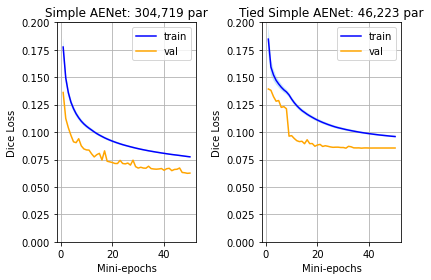

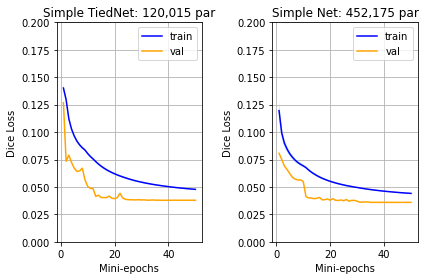

In [10]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.2])
plt.title("Simple AENet: 304,719 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.2])
plt.title("Tied Simple AENet: 46,223 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.2])
plt.title("Simple Net: 452,175 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.2])
plt.title("Simple TiedNet: 120,015 par")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores4, train_var_4)]
ziptraindown = [a - b for a, b in zip(train_scores4, train_var_4)]
zipvalup = [a + b for a, b in zip(val_scores4, val_var_4)]
zipvaldown = [a - b for a, b in zip(val_scores4, val_var_4)]

plt.plot(x_values, train_scores4, color="blue", label="train")
a1.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores4, color="orange", label="val")
a1.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.close()